In [74]:
import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import animation, cm
import seaborn as sns

# working with time
import datetime
from scipy import stats
from scipy import optimize

# pandas data reader for downloading data
from pandas_datareader.data import DataReader
from pandas_datareader.famafrench import FamaFrenchReader, get_available_datasets

# for typehints
from typing import Union, List

# cvxopt and cvxpy for optimization
import cvxopt
import cvxpy as cp

"""
Own packages
"""

# nominal yield curve data
from codelib.dal.fred_yield_data import get_nominal_yield_data

# moments: kurtosis with probs, etc.
from codelib.statistics import moments as mom

# functions for calculating risk budget and portfolio risk metrics
from codelib.portfolio_optimization import risk_budget as rb
from codelib.portfolio_optimization import risk_metrics as rm

from codelib.visualization.base import correlation_plot, risk_waterfall_chart, waterfall_chart

# Default plotting layout
from codelib.visualization.layout import DefaultStyle
DefaultStyle();

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercises - Week 5

In this week we will look at a few exercises involving minimization and maximization.


## Problem 1: Second order conditions

In this problem, we will look at the [second derivative test](https://en.wikipedia.org/wiki/Second_partial_derivative_test) for determining whether a critical point is a local minimum or maximum.

Consider the function

$$
f(x,y,z) = -x^2 - y^2 - z^2
$$

__Question 1__

What are the first order partial derivatives? Find the stationary/critical point. Also maximize the function using `scipy.optimize.minimize`.

__Question 2__

What are the second order partial derivatives? Write up the Hessian.

__Question 3__

The properties of the Hessian matrix are important for determining whether the critical point / stationary point is a maximum, minimum or neither of the two.

* If the Hessian is negative definite, then the stationary point is a local maximum
* If the Hessian is positive definite, then the stationary point is a local minimum
* If the Hessian is indefinite, then the stationary point is a a saddle point

Otherwise, the test is inconclusive.

We need to remember that a [definite matrix](https://en.wikipedia.org/wiki/Definite_matrix) can be defined in the following way. A  symmetric matrix, $\mathbf{A}$, is said to be positive definite if for every vector $\mathbf{v} \neq \mathbf{0}$

$$
\mathbf{v}^\top  \mathbf{A} \mathbf{v} > 0
$$

and negative definite if

$$
\mathbf{v}^\top  \mathbf{A} \mathbf{v} < 0
$$
For semi-definiteness replace $>$ and $<$ with respectively $\geq$ and $\leq$.


Is the matrix negative definite?

__Question 4__

For a symmetric, positive definite matrix then the above definition will be equivalnt to all the eigenvalues being positive. For a negative definite matrix then all the eigenvalues will be negative.

Find the eigenvalues (use e.g. `numpy.linalg.eigvals`).

__Question 5__

Will the stationary point be a minimum or maximum?

__Question 6__

Assume now that $f(x,y,z) = -x^2 + y^2 - z^2$. Will this function also have a maximum at $(x,y,z) = (0, 0, 0)$?

__Question 7__

Define a function that checks if a symmetric matrix is negative definite.



### Solution

__Question 1__

The first order partial derivatives are given by

\begin{eqnarray}
f_x^\prime(x,y,z) &=& -2x \nonumber \\
f_y^\prime(x,y,z) &=& -2y \nonumber  \\
f_z^\prime(x,y,z) &=& -2z \nonumber
\end{eqnarray}

The only solution to the three equations obtained by setting the partial derivatives equal to zero is $(x, y, z) = (0,0,0)$



In [75]:
func_prob1 = lambda x: -x[0]**2 - x[1]**2 - x[2]**2

# remember that we want to maximize
res = optimize.minimize(lambda x: -func_prob1(x), [1,2,-1])
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.2847621921537123e-15
        x: [-4.673e-08 -2.118e-08 -2.555e-08]
      nit: 2
      jac: [-7.855e-08 -2.745e-08 -3.620e-08]
 hess_inv: [[ 9.167e-01 -1.667e-01  8.333e-02]
            [-1.667e-01  6.667e-01  1.667e-01]
            [ 8.333e-02  1.667e-01  9.167e-01]]
     nfev: 12
     njev: 3

__Question 2__

The second order partial derivatives are given by

\begin{eqnarray}
f_{xx}^{\prime\prime}(x,y,z) &=& -2 \nonumber \\
f_{yy}^{\prime\prime}(x,y,z) &=& -2 \nonumber  \\
f_{zz}^{\prime\prime}(x,y,z) &=& -2 \nonumber \\
f_{xy}^{\prime\prime}(x,y,z) &=& 0 \nonumber \\
f_{xz}^{\prime\prime}(x,y,z) &=& 0 \nonumber \\
f_{yz}^{\prime\prime}(x,y,z) &=& 0 \nonumber \\
\end{eqnarray}

The Hessian is therefore
$$
H(x,y,z) = \begin{bmatrix}
-2 & 0 & 0 \\
0 & -2 & 0 \\
0 & 0 & -2
\end{bmatrix}
$$

__Question 3__


If the Hessian matrix is negative definite, then the quadratic form

$$
\mathbf{v}^\top \mathbf{H} \mathbf{v} = -2v_1^2 - 2v_2^2 -2 v_3^2
$$

should be negative for all $\mathbf{v} \neq \mathbf{0}$. Since $v_1^2, v_2^2, v_3^2$ always will be positive, then the quadratic form will always be negative.

__Question 4__

The eigenvalues will solve

$$
\det \left(\mathbf{H} - \lambda \mathbf{I} \right) = \det \begin{bmatrix}
-2 - \lambda & 0 & 0 \\
0 & -2  - \lambda & 0 \\
0 & 0 & -2 - \lambda
\end{bmatrix} = (-2 - \lambda)(-2 - \lambda)(-2 - \lambda) = 0
$$

Thus, all eigenvalues must be equal to $\lambda = -2$.

This is in agreement with the results from the previous problem. Having all negative eigenvalues corresponds to the matrix under consideration being negative definite.

In [76]:
hess_mat = np.diag(np.ones(3) * -2)

np.linalg.eigvals(hess_mat)

array([-2., -2., -2.])

__Question 5__

The stationary point will be a (global) maximum since the Hessian is negative definite

__Question 6__

Again, we will have

$$
\begin{eqnarray}
f_x^\prime(x,y,z) &=& -2x \nonumber \\
f_y^\prime(x,y,z) &=& 2y \nonumber  \\
f_z^\prime(x,y,z) &=& -2z
\end{eqnarray}
$$

with a stationary point at $(x,y,z) = (0, 0, 0)$.

The Hessian is
$$
H(x,y,z) = \begin{bmatrix}
-2 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & -2
\end{bmatrix}
$$

which will have two eigenvalues equal to $-2$ and one eigenvalue equal to $2$. The Hessian will therefore be indefinite and the stationary point will be a saddle point.

In [77]:
hess_new_mat = np.diag([-2, 2, -2])

np.linalg.eigvals(hess_new_mat)

array([-2.,  2., -2.])

__Question 7__

In [78]:
def is_neg_def(matrix: np.array) -> bool:
    return np.all(np.linalg.eigvals(matrix) < 0)

In [79]:
is_neg_def(hess_mat)

np.True_

In [80]:
is_neg_def(hess_new_mat)

np.False_

## Problem 2: Minimizing distance

Assume that Luke Skywalker is currently located at the point $A=(x,y,z)=(5, 5, 5)$ in his X-Wing Starfighter. He needs to gather critical information on the planet Endor before joining the rebel forces at the point $B=(x,y,z) = (6, 6, 6)$. The planet Endor is defined by the 3D ball

$$
x^2 + y^2 + z^2 = 1
$$

__Question 1__

What is the formula for the distance between the point $A$ and a arbitrary point on the surface of the planet $C$ and back to the point $B$? ([euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance) or [euclidian norm](https://en.wikipedia.org/wiki/Norm_(mathematics)))

__Question 2__


What is the total distance when $C = (1, 0, 0)$?

__Quesiton 3__

We want to help Luke Skywalker to find the optimal place on Endor to retrieve the information. Set up the constrained minimization problem that Luke Skywalker is facing.

__Quesiton 4__

Solve the constrained minimization problem numerically.



### Solution

__Question 1__

Define $C=(x,y,z)$ to be an abitrary point on the planet. Then, we calcuclate the distance between $A$ and $C$ as

$$
\vert \vert C-A \vert \vert = \sqrt{(x-5)^2 + (y-5)^2 + (z-5)^2}
$$

and the distance between $C$ and $B$ as

$$
\vert \vert B-C \vert \vert = \sqrt{(6-x)^2 + (6-y)^2 + (6-z)^2}
$$

Thus, the total distance will be

$$
\vert \vert C-A \vert \vert + \vert \vert B-C \vert \vert  = \sqrt{(x-5)^2 + (y-5)^2 + (z-5)^2} + \sqrt{(6-x)^2 + (6-y)^2 + (6-z)^2}
$$

__Question 2__

In [81]:
def distance_function(C):

    A = np.array([5, 5, 5])
    B = np.array([6, 6, 6])
    C = np.array(C)

    return np.linalg.norm(C-A) + np.linalg.norm(B-C)

distance_function([1,0,0])

np.float64(17.972896206432065)

__Question 3__

$$
\arg \min f(x,y,z) \; \text{ s.t. } x^2 + y^2 + z^2 = 1
$$

where

$$
f(x,y,z) = \vert \vert C-A \vert \vert + \vert \vert B-C \vert \vert
$$

__Question 4__



In [82]:
def constraint_ball(P):

    return P[0]**2 + P[1]**2 + P[2]**2 - 1.0

constraint = {'type':'eq', 'fun': constraint_ball}

res = optimize.minimize(distance_function, [1, 1, 1], constraints=constraint)
res

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 17.05255888043153
           x: [ 5.774e-01  5.774e-01  5.774e-01]
         nit: 5
         jac: [-1.155e+00 -1.155e+00 -1.155e+00]
        nfev: 20
        njev: 5
 multipliers: [-1.000e+00]

In [83]:
distance_function(res.x)

np.float64(17.05255888043153)

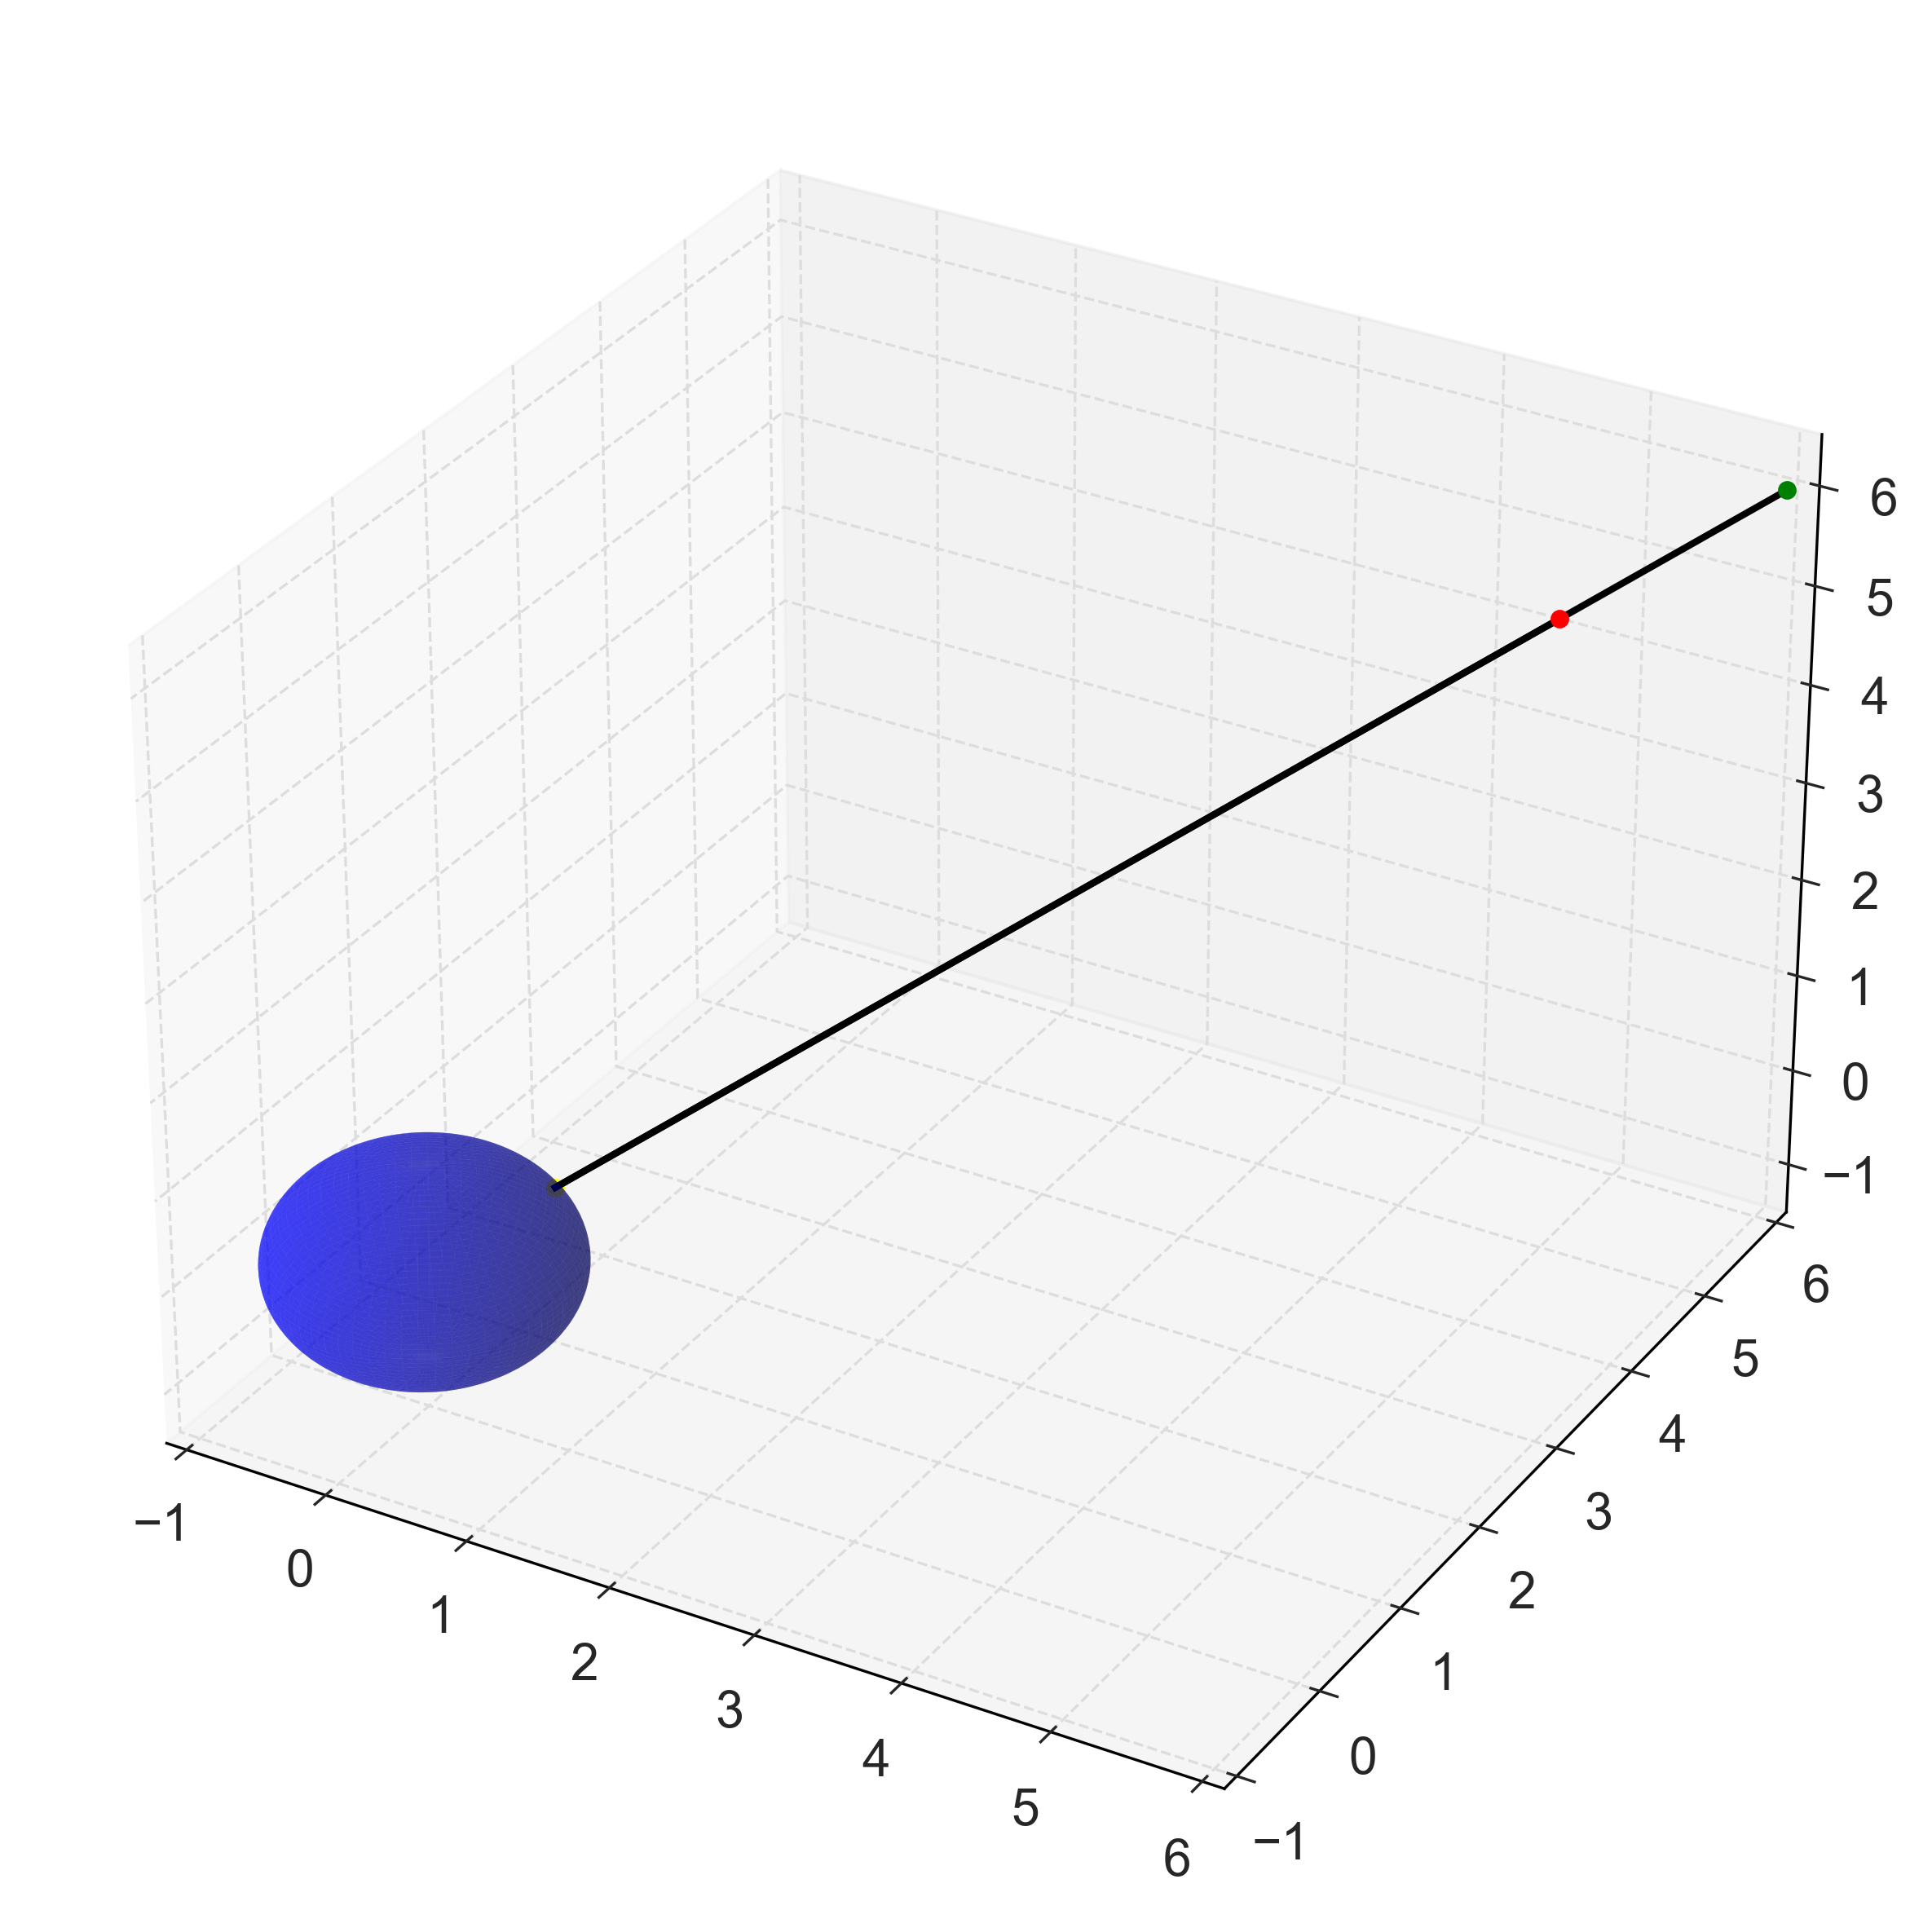

In [84]:
fig = plt.figure(figsize=(10,10), dpi=300)
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 250)
v = np.linspace(0, np.pi, 250)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)

ax.plot([5,1.0/np.sqrt(3)], [5,1.0/np.sqrt(3)], [5,1.0/np.sqrt(3)], color="black");
ax.plot([6,1.0/np.sqrt(3)], [6,1.0/np.sqrt(3)], [6,1.0/np.sqrt(3)], color="black");

ax.scatter(5,5,5, color="red");
ax.scatter(1.0/np.sqrt(3),1.0/np.sqrt(3),1.0/np.sqrt(3), color="yellow", zorder=25);
ax.scatter(6,6,6, color="green");

### Problem 3: Portfolio optimization with constraints

One way to cast the investor's one period portfolio optimization problem (in a Markowitz framework) is to minimize the portfolio variance $\text{Var}[R_p]$

$$
\underset{\mathbf{w}}{\text{arg min}} \text{Var}[R_p] = \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}
$$

subject to meeting the target return $p$

$$
\mathbf{w}^\top \boldsymbol{\mu} = p
$$

We also want the portfolio weights to sum to one and not allow for short-selling

$$
\begin{align}
\mathbf{w}^\top \mathbf{1} &= 1 \\
w_i &\geq 0, \; i=1,2, ..., N
\end{align}
$$

__Question 1__

Obtain the value weighted monthly return data for the Fama-French industry portfolios ("12_Industry_Portfolios") using `pandas-datareader` since 1999-01-01. Calculate the expected monthly mean return and covariance matrix.


__Question 2__

Solve the previously defined optimization problem using the estimates from question 1. Consider different relevant target values for $p$ (expected monthly return).

__Question 3__

Plot the optimal allocation and the efficient frontier in two seperat figures.

__Question 4__

Repeat the calculations in the two previous questions when allocation to a particular index is restricted to be no more than 30%.


### Solution

__Question 1__

In [85]:
#get_available_datasets()

In [86]:
reader = FamaFrenchReader("12_Industry_Portfolios",
                          start=datetime.datetime(1999, 1, 1))
industry_port = reader.read()

# print description
industry_port['DESCR']

C:\Users\johan\AppData\Local\Temp\ipykernel_11052\3891303947.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_11052\3891303947.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_11052\3891303947.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_11052\3891303947.py:3: FutureWarning: The argument 'date_parse

'12 Industry Portfolios\n----------------------\n\nThis file was created using the 202508 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2025 Eugene F. Fama and Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Monthly (320 rows x 12 cols)\n  1 : Average Equal Weighted Returns -- Monthly (320 rows x 12 cols)\n  2 : Average Value Weighted Returns -- Annual (26 rows x 12 cols)\n  3 : Average Equal Weighted Returns -- Annual (26 rows x 12 cols)\n  4 : Number of Firms in Portfolios (320 rows x 12 cols)\n  5 : Average Firm Size (320 rows x 12 cols)\n  6 : Sum of BE / Sum of ME (27 rows x 12 cols)\n  7 : Value-Weighted Average of BE/ME (27 rows x 12 cols)'

In [87]:
# get equally weighted
ind_eq_weighted = industry_port[1] / 100

# get market cap weighted
ind_mc_weighted = industry_port[0] / 100

# asset list
asset_list = ind_mc_weighted.columns

In [88]:
mu_est  = ind_mc_weighted.mean().values
cor_mat_est = ind_mc_weighted.corr().values
vol_est = ind_mc_weighted.std().values
cov_mat_est = np.outer(vol_est, vol_est) * cor_mat_est

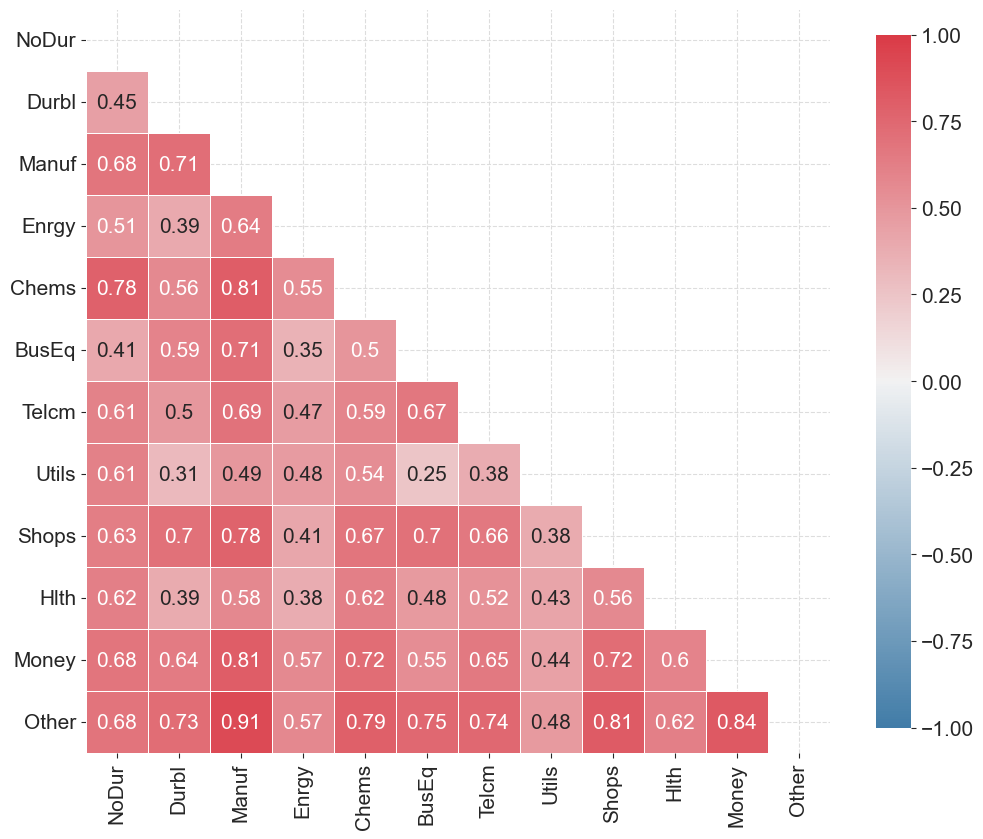

In [89]:
fig, ax = plt.subplots(figsize=(12, 12))
correlation_plot(cor_mat_est, names=asset_list, include_values=True, ax=ax)

__Question 2__

In [90]:
max_exp_ret = max(mu_est)
min_exp_ret = min(mu_est)

In [91]:
# define objective function
def portfolio_variance(w: np.ndarray, cov_mat: np.ndarray):
    return w @ cov_mat @ w

# define common constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0,
                   'jac' : lambda x: np.ones_like(x)}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x,
                 'jac' : lambda x: np.eye(len(x))}

# alternatively use
bounds = [(0.0, 1.0)] * len(mu_est)

# define constraint
target_cons = {'type': 'eq',
               'fun' : lambda x: x @ mu_est - max_exp_ret,
               'jac' : lambda x: mu_est}

port_var_der = lambda w, cov_mat: 2 * w @ cov_mat


x0 = np.ones_like(mu_est) / len(mu_est)
res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_est,),
                        method='SLSQP',
                        jac=port_var_der,
                        constraints=[sum_to_one_cons,
                                     no_short_cons,
                                     target_cons],  # no_short_cons,
                        options={'ftol': 1e-9, 'disp': True}) #, bounds=bounds)

res

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.004733086260870746
            Iterations: 3
            Function evaluations: 14
            Gradient evaluations: 3


     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.004733086260870746
           x: [-3.564e-13  2.910e-12 -1.293e-12  2.767e-12 -5.078e-13
                1.000e+00 -2.735e-14 -1.327e-12  1.394e-13 -1.950e-12
                1.255e-12  2.047e-12]
         nit: 3
         jac: [ 2.031e-03  7.623e-03  5.668e-03  3.422e-03  2.976e-03
                9.466e-03  4.899e-03  1.464e-03  4.471e-03  2.719e-03
                4.311e-03  5.275e-03]
        nfev: 14
        njev: 3
 multipliers: [-1.137e+12  1.069e+14 ...  3.070e+11  3.877e+11]

In [92]:
"""
Loop over different target expected return
"""

x0 = np.ones_like(mu_est) / len(mu_est)
port_weights = list()
mu_targets = np.arange(min_exp_ret, max_exp_ret, 0.0001)
for p in mu_targets:

    # define constraint
    target_cons = {'type': 'eq',
                   'fun' : lambda x: x @ mu_est - p,
                   'jac' : lambda x: mu_est}

    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_est,),
                            method='SLSQP',
                            jac=port_var_der,
                            constraints=[sum_to_one_cons, target_cons],
                            options={'ftol': 1e-9, 'disp': False},bounds=bounds)

    port_weights.append(res.x)

port_weights = np.array(port_weights) * 100

In [93]:
#port_weights
#mu_targets

__Question 3__

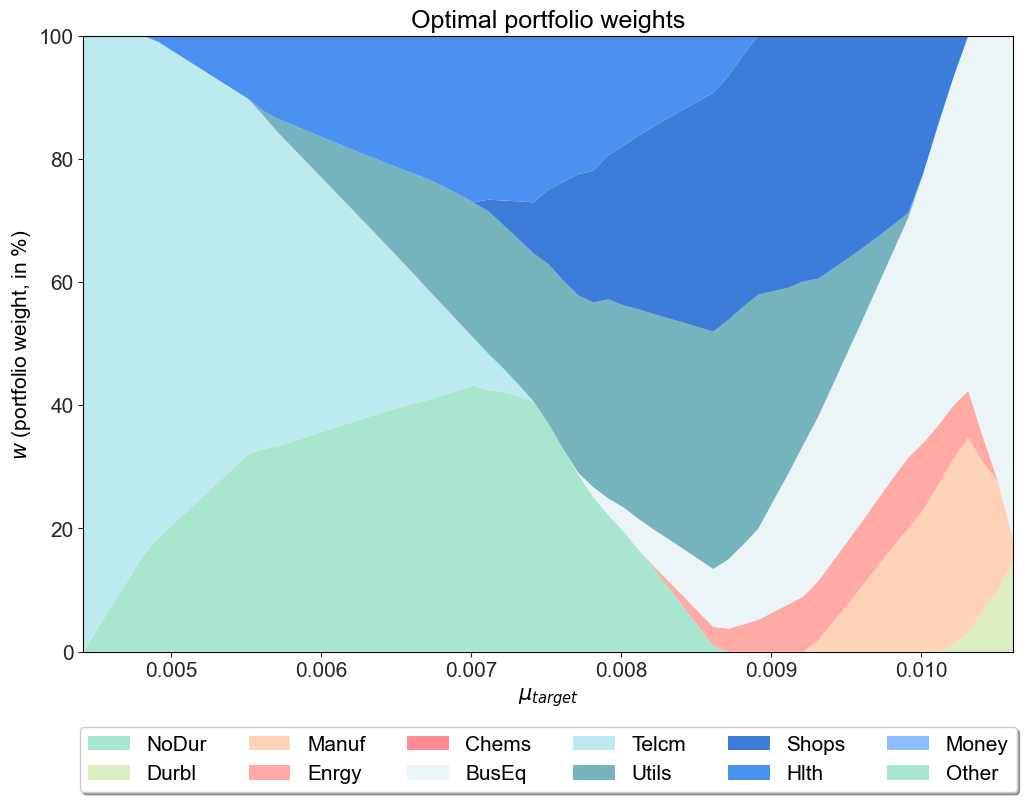

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(mu_targets, port_weights.T, labels=asset_list);
ax.set_xlabel('$\\mu_{target}$')
ax.set_ylabel('$w$ (portfolio weight, in %)');
ax.set_title('Optimal portfolio weights');
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=6);

In [95]:
port_weights.shape

(63, 12)

(0.0034153125, 0.011638437500000001)

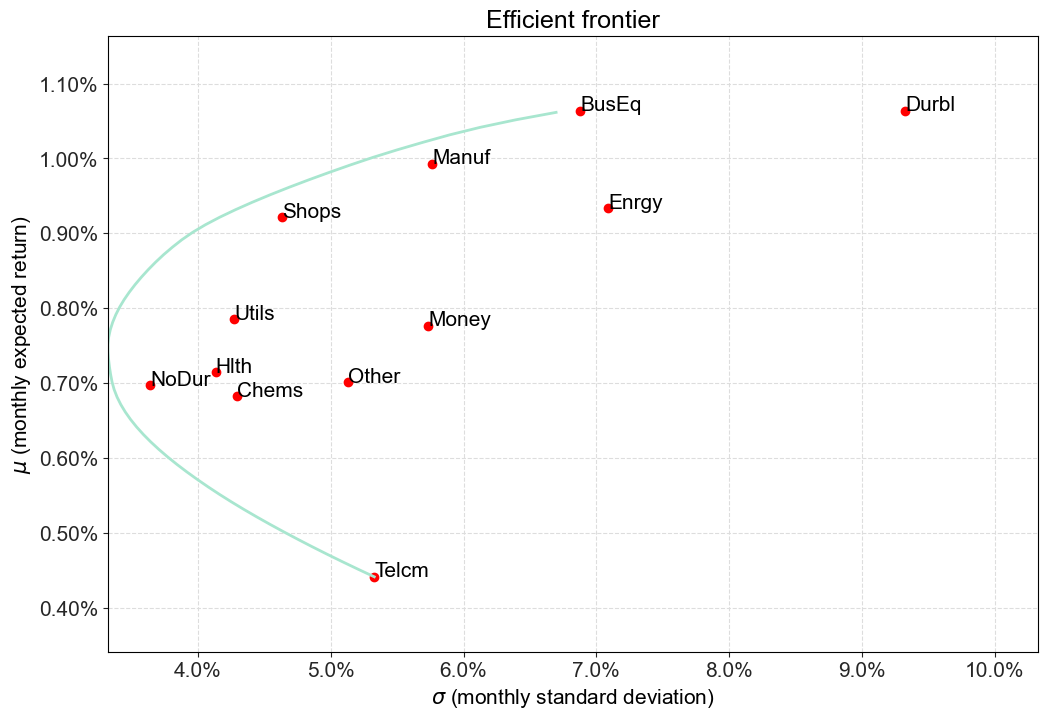

In [96]:
all_port_std = np.sqrt(np.apply_along_axis(portfolio_variance, 1,
                                           port_weights / 100, cov_mat_est))
all_mu = port_weights @ mu_est / 100.0


fig, ax = plt.subplots(figsize=(12,8))

ax.plot(all_port_std, all_mu, label='Efficient frontier')
ax.scatter(vol_est, mu_est, color="red", label="Individual assets");
ax.set_title('Efficient frontier');

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

ax.set_xlabel('$\\sigma$ (monthly standard deviation)')
ax.set_ylabel('$\\mu$ (monthly expected return)');

# add asset names
for i, xy in enumerate(zip(vol_est, mu_est)):
    ax.annotate(asset_list[i], xy)

# fix axes
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1] + 0.01])
ax.set_ylim([ax.get_ylim()[0] - 0.001, ax.get_ylim()[1] + 0.001])

__Question  4__

In [97]:
bounds = [(0.0, 0.3)] * len(mu_est) # implement constraint
x0 = np.ones_like(mu_est) / len(mu_est)
port_weights = list()
mu_targets = np.arange(min_exp_ret + 0.003, max_exp_ret - 0.0005, 0.0001)
for p in mu_targets:

    # define constraint
    target_cons = {'type': 'eq',
               'fun' : lambda x: x @ mu_est - p,
               'jac' : lambda x: mu_est}

    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_est,),
                            method='SLSQP',
                            jac=port_var_der,
                            constraints=[sum_to_one_cons, target_cons],
                            options={'ftol': 1e-9, 'disp': False}, bounds=bounds)

    port_weights.append(res.x)

port_weights = np.array(port_weights) * 100

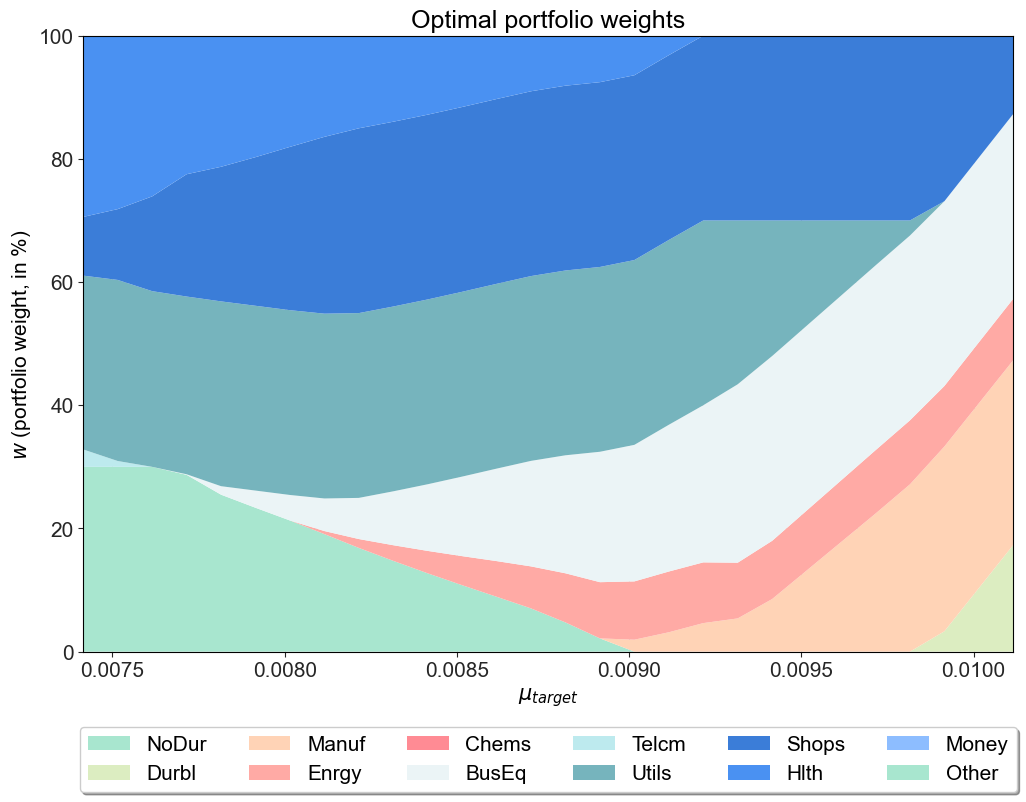

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(mu_targets, port_weights.T, labels=asset_list);
ax.set_xlabel('$\\mu_{target}$')
ax.set_ylabel('$w$ (portfolio weight, in %)');
ax.set_title('Optimal portfolio weights');
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=6);

(0.0034153125, 0.011638437500000001)

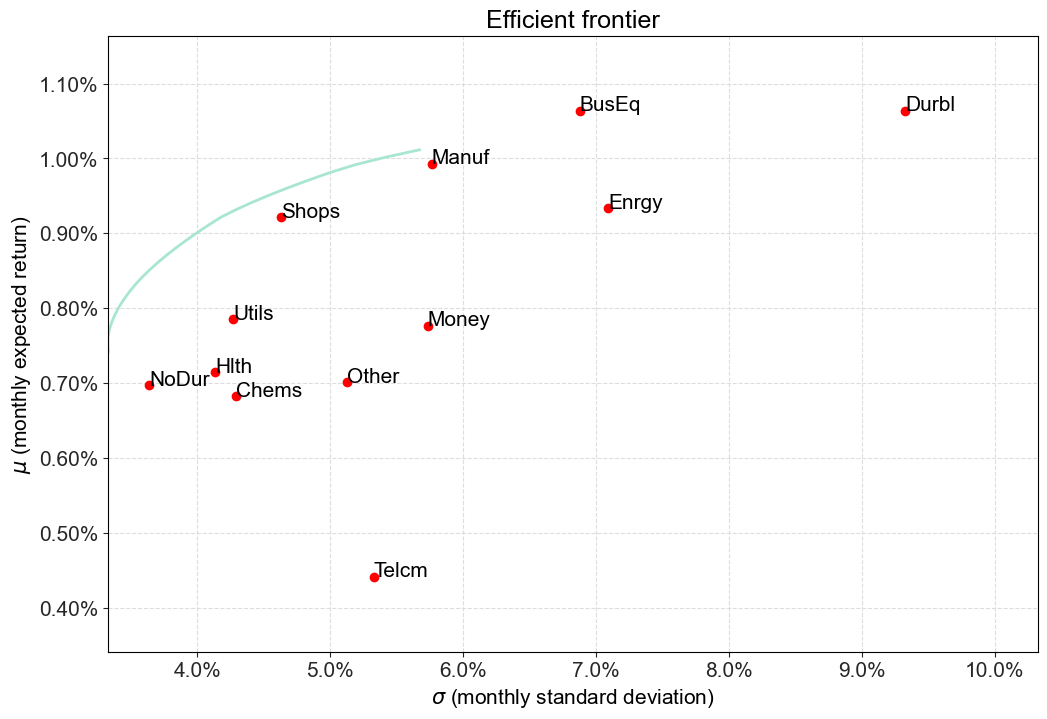

In [99]:
all_port_std = np.sqrt(np.apply_along_axis(portfolio_variance, 1, port_weights / 100, cov_mat_est))
all_mu = port_weights @ mu_est / 100.0


fig, ax = plt.subplots(figsize=(12,8))

ax.plot(all_port_std, all_mu, label='Efficient frontier')
ax.scatter(vol_est, mu_est, color="red", label="Individual assets");
ax.set_title('Efficient frontier');

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

ax.set_xlabel('$\\sigma$ (monthly standard deviation)')
ax.set_ylabel('$\\mu$ (monthly expected return)');


# add asset names
for i, xy in enumerate(zip(vol_est, mu_est)):
    ax.annotate(asset_list[i], xy)

# fix axes
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1] + 0.01])
ax.set_ylim([ax.get_ylim()[0] - 0.001, ax.get_ylim()[1] + 0.001])

## Problem 4:  Minimizing CVaR (and VaR)

We now assume that an investor's one period portfolio optimization problem is to minimize the portfolio $\text{CVaR}_\beta[R_p]$

$$
\underset{\mathbf{w}}{\text{arg min }}  \text{CVaR}_\beta[R_p]
$$

subject to meeting the target return $p$

$$
\mathbf{w}^\top \boldsymbol{\mu} = p
$$

We also want the portfolio weights to sum to one and not allow for short-selling

$$
\begin{align}
\mathbf{w}^\top \mathbf{1} &= 1 \\
w_i &\geq 0, \; i=1,2, ..., N
\end{align}
$$


__Question 1__

Implement the Mean-CVaR optimization problem using the same data set as in the previous problem for some target return. Let $\beta = 0.95$ (95% CVaR).


__Question 2__

Consider different relevant target values for $p$ (expected monthly return).

Plot the optimal allocations and the efficient frontier.

### Solution

__Question 1__

In [100]:
reader = FamaFrenchReader("12_Industry_Portfolios", start=datetime.datetime(1999, 1, 1))
industry_port = reader.read()

# print description
industry_port['DESCR']

# get equally weighted
ind_eq_weighted = industry_port[1] / 100

# get market cap weighted
ind_mc_weighted = industry_port[0] / 100

# asset list
asset_list = ind_mc_weighted.columns

C:\Users\johan\AppData\Local\Temp\ipykernel_11052\1882509618.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_11052\1882509618.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_11052\1882509618.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_11052\1882509618.py:2: FutureWarning: The argument 'date_parse

In [101]:
mu_est  = ind_mc_weighted.mean().values
cor_mat_est = ind_mc_weighted.corr().values
vol_est = ind_mc_weighted.std().values
cov_mat_est = np.outer(vol_est, vol_est)*cor_mat_est

In [102]:
def calculate_cvar(w: np.ndarray, returns: np.ndarray, beta: float = 0.95):

    # portfolio returns
    port_returns = returns @ w

    # percentile
    perc = np.percentile(port_returns, (1 - beta)*100)

    # average in tail
    avg_tail = np.mean(port_returns[port_returns <= perc])

    return -avg_tail

In [103]:
# define common constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

# alternatively use
bounds = [(0.0, 1.0)] * len(mu_est)

# define constraint
target_cons = {'type': 'eq',
               'fun' : lambda x: x @ mu_est - 0.009}


x0 = np.ones_like(mu_est) / len(mu_est)
res1 = optimize.minimize(calculate_cvar, x0=x0, args=(ind_mc_weighted.values, 0.95),
                        method='SLSQP',
                        constraints=[sum_to_one_cons,  target_cons],
                        options={'ftol': 1e-9, 'disp': True}, bounds=bounds)

res1

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08483395258450532
            Iterations: 14
            Function evaluations: 200
            Gradient evaluations: 14


     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.08483395258450532
           x: [ 3.325e-17  1.292e-17  6.559e-18  3.360e-02  1.736e-18
                1.176e-01  2.604e-21  1.477e-01  6.118e-01  8.927e-02
                5.302e-18  1.100e-17]
         nit: 14
         jac: [ 5.311e-02  1.389e-01  1.114e-01  9.337e-02  6.877e-02
                1.095e-01  7.861e-02  6.563e-02  8.897e-02  5.255e-02
                9.282e-02  1.000e-01]
        nfev: 200
        njev: 14
 multipliers: [-6.084e-02  1.619e+01]

__Question 2__

In [104]:
max_exp_ret = max(mu_est)
min_exp_ret = min(mu_est)
x0 = np.r_[np.ones_like(mu_est) / len(mu_est)]
port_weights = list()
mu_targets = np.arange(min_exp_ret + 0.003, max_exp_ret - 0.0005, 0.0001)
for p in mu_targets:

    # define constraint
    target_cons = {'type': 'eq',
                   'fun' : lambda x: x @ mu_est - p}

    res = optimize.minimize(calculate_cvar, x0=x0, args=(ind_mc_weighted.values, 0.95),
                        method='SLSQP',
                        constraints=[sum_to_one_cons,  target_cons],
                        options={'ftol': 1e-12, 'disp': True, 'maxiter': 1000, 'eps': 1e-12}, bounds=bounds)

    port_weights.append(res.x)

port_weights = np.array(port_weights)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07040164032825058
            Iterations: 33
            Function evaluations: 467
            Gradient evaluations: 33
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07035240907760679
            Iterations: 40
            Function evaluations: 578
            Gradient evaluations: 40
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07060102732724392
            Iterations: 75
            Function evaluations: 1097
            Gradient evaluations: 75
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0709203899740602
            Iterations: 56
            Function evaluations: 839
            Gradient evaluations: 56
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0713594999533689
            Iterations: 55
            Func

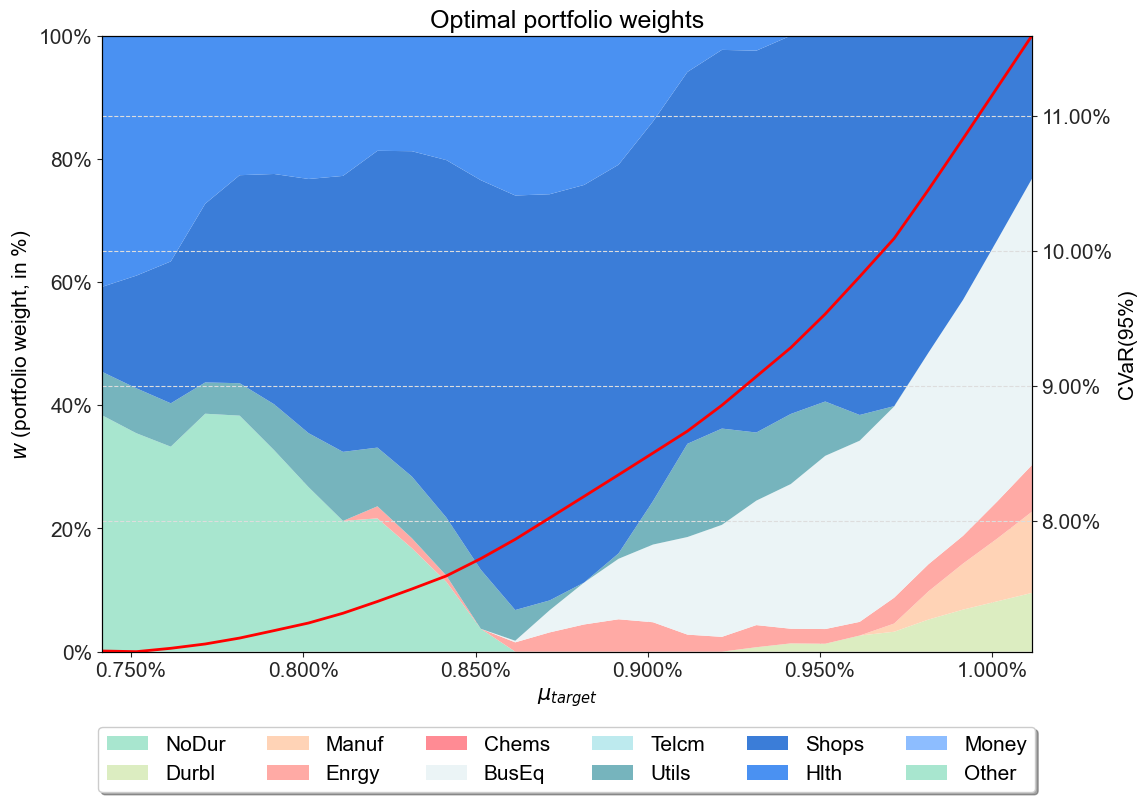

In [105]:
"""
Plotting
"""

fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(mu_targets, port_weights.T, labels=asset_list);
ax.set_xlabel('$\\mu_{target}$')
ax.set_ylabel('$w$ (portfolio weight, in %)');
ax.set_title('Optimal portfolio weights');
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=6);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))


all_port_cvar = np.apply_along_axis(calculate_cvar, 1, port_weights , ind_mc_weighted.values, 0.95)
all_mu = port_weights @ mu_est

ax_new = ax.twinx()
ax_new.plot(all_mu, all_port_cvar,  color="red")

ax_new.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax_new.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax_new.set_ylabel('CVaR(95%)');

## Problem 5: Classical Mean-Variance optimization with constraints

An investor can invest in 10 different assets: Government bonds, Investment-grade bonds, High-yield bonds, Emerging markets gov. bonds, Equities (developed markets), Equities (Emerging markets), Private equity, Infrastructure, Real Estate, and Hedgefunds.  The continuously compounded / log-returns are assumed to be i.i.d. multivariate normally distributed

\begin{equation*}
	\mathbf{r}_{t + 1, 1} \sim MVN(\boldsymbol{\mu},\boldsymbol{\Sigma})
\end{equation*}

with correlation matrix

\begin{equation*}
	\mathbf{C} =   \begin{bmatrix}
		1.0 &  0.6 &  0.1 &  0.3 & -0.1 & -0.1 & -0.2 & -0.1 & -0.1 & -0.1 \\
		0.6 &  1.0 &  0.6 &  0.6 &  0.2 &  0.2 &  0.2 &  0.1 &  0.1 &  0.3 \\
		0.1 &  0.6 &  1.0 &  0.7 &  0.7 &  0.6 &  0.6 &  0.4 &  0.3 &  0.7 \\
		0.3 &  0.6 &  0.7 &  1.0 &  0.5 &  0.6 &  0.4 &  0.2 &  0.2 &  0.5 \\
		-0.1 &  0.2 &  0.7 &  0.5 &  1.0 &  0.7 &  0.8 &  0.4 &  0.4 &  0.8 \\
		-0.1 &  0.2 &  0.6 &  0.6 &  0.7 &  1.0 &  0.7 &  0.4 &  0.4 &  0.7 \\
		-0.2 &  0.2 &  0.6 &  0.4 &  0.8 &  0.7 &  1.0 &  0.4 &  0.4 &  0.7 \\
		-0.1 &  0.1 &  0.4 &  0.2 &  0.4 &  0.4 &  0.4 &  1.0 &  0.3 &  0.4 \\
		-0.1 &  0.1 &  0.3 &  0.2 &  0.4 &  0.4 &  0.4 &  0.3 &  1.0 &  0.4 \\
		-0.1 &  0.3 &  0.7 &  0.5 &  0.8 &  0.7 &  0.7 &  0.4 &  0.4 &  1.0
	\end{bmatrix},
\end{equation*}

vector of volatilities

\begin{equation*}
	\mathbf{v} =   \begin{bmatrix}
		0.037, 0.055, 0.119, 0.107, 0.153, 0.217, 0.204, 0.14, 0.108, 0.094
	\end{bmatrix}^\top,
\end{equation*}

and expected log return


\begin{equation*}
	\boldsymbol{\mu} =   \begin{bmatrix}
		0.019, 0.022, 0.049, 0.043, 0.061, 0.083, 0.102, 0.056, 0.041, 0.038
	\end{bmatrix}^\top - \frac{1}{2} \text{Diag}(\boldsymbol{\Sigma}),
\end{equation*}

__Question 1__


Assume that $\mathbf{P}_0 = 1$. What is the distribution of the net portfolio return $\mathbf{w}^\top \mathbf{R}_1 = \mathbf{w}^\top \frac{\mathbf{P}_1}{\mathbf{P}_0} - 1$?  What is the expected portfolio return and standard deviation?


__Question 2__

Calculate the expected value and standard devation of an equally weighted portfolio. Calculate and visualize the risk contribution based on standard deviation as risk measure.

__Question 3__

Define and solve the minimization problem using `cvxopt` or `cvxpy`

$$
\begin{align*}
	\min_{\mathbf{x}}  \quad & \mathbf{w}^\top  \text{Cov}[\mathbf{R}_1]  \mathbf{w} \\
	\textrm{s.t.} \quad
     & \mathbf{1}^\top \mathbf{w} = 1\\
     & \text{E}[\mathbf{R}_1]^\top \mathbf{w} = \bar{\mu}\\
	 & \mathbf{w} \geq \mathbf{0}
\end{align*}
$$

Thus, minimize the portfolio variance subject to a given target return $\bar{\mu}$. Consider 50 different return targets from the lowest to the highest possible.

Plot the optimal portfolio weights using a `matplotlib.pyplot.stackplot` for the return targets.

__Question 4__

Using the optimal portfolios from above, plot the efficient frontier (plot the standard deviations against the expected return). Add the assets to the plot.

__Question 5__

The optimal portfolios are dominated by a few assets. We want to impose a maximum allocation of $0.25$. Furthermore, we want to impose a maximum allocation of $0.4$ to alternatives: Private equity, Infrastructure, Real Estate, Hedgefunds.

Repeat the last two questions, when imposing these constraints.


### Solution

__Question 1__

We have assumed that the log-returns follow a multivariate normal distribution

$$
\mathbf{r}_{t+ 1, 1} = \log \frac{\mathbf{P}_{t+1}}{\mathbf{P}_t} \sim MVN(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$

Thus, the vector of asset prices at year one follows a multivariate log-normal distribution

$$
\log \mathbf{P}_1 \sim MVN(\boldsymbol{\mu}, \boldsymbol{\Sigma}) \Leftrightarrow \mathbf{P}_1 \sim \log MVN(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$

The value of the portfolio in one year $\mathbf{w}^\top \mathbf{P}_1$ does not follow a log-normal since the weighted sum of log-normals does not follow a log-normal distribution! However, it is possible to derive the expected value and the variance


We need to find the expected value and covariance of the linear returns. We have

$$
\text{E}[e^{\mathbf{r}_{1, 1}}] = \text{E}[\mathbf{P}_{1}] = e^{\boldsymbol{\mu}   + \frac{1}{2}\text{diag}(\boldsymbol{\Sigma})}
$$

and

$$
\text{Cov}[e^{\mathbf{r}_{1, 1}}] =  \text{Cov}[\mathbf{P}_{1}] =  \text{E}[e^{\mathbf{r}_{1, 1}}] \text{E}[e^{\mathbf{r}_{1,1}}]^\top \odot \left(e^{\boldsymbol{\Sigma}} - \mathbf{1} \right)
$$

The expected value and covariance of the linear returns are therefore

$$
\text{E}[\mathbf{R}_{1}] = \text{E}[\mathbf{P}_{1} - 1 ] = e^{\boldsymbol{\mu}  + \frac{1}{2}\text{diag}(\boldsymbol{\Sigma})} - 1
$$

and

$$
\text{Cov}[\mathbf{R}_{1}] =  \text{Cov}[\mathbf{P}_{1}] =  \text{E}[e^{\mathbf{r}_{1, 1}}] \text{E}[e^{\mathbf{r}_{1,1}}]^\top \odot \left(e^{\boldsymbol{\Sigma}} - \mathbf{1} \right)
$$


The portfolio return

$$
R_w = \mathbf{w}^\top \mathbf{R}_1
$$

has the expected value

$$
\text{E}[R_w] =  \mathbf{w}^\top \text{E}[\mathbf{R}_{1}]
$$

and variance

$$
\text{Var}[R_w] = \mathbf{w}^\top \text{Cov}[\mathbf{R}_{1}] \mathbf{w}
$$

__Question 2__

In [106]:
"""
Define inputs
"""

asset_names = ["Government bonds", "Investment-grade bonds", "High-yield bonds",
               "Emerging markets gov. bonds", "Equities (developed markets)",
               "Equities (Emerging markets)", "Private equity", "Infrastructure",
               "Real Estate", "Hedgefunds"]

corr_mat = np.array([[1.00, 0.60, 0.10, 0.30, -0.10, -0.10, -0.20, -0.10, -0.10, -0.10],
                     [0.60, 1.00, 0.60, 0.60, 0.20, 0.20, 0.20, 0.10, 0.10, 0.30],
                     [0.10, 0.60, 1.00, 0.70, 0.70, 0.60, 0.60, 0.40, 0.30, 0.70],
                     [0.30, 0.60, 0.70, 1.00, 0.50, 0.60, 0.40, 0.20, 0.20, 0.50],
                     [-0.10, 0.20, 0.70, 0.50, 1.00, 0.70, 0.80, 0.40, 0.40, 0.80],
                     [-0.10, 0.20, 0.60, 0.60, 0.70, 1.00, 0.70, 0.40, 0.40, 0.70],
                     [-0.20, 0.20, 0.60, 0.40, 0.80, 0.70, 1.00, 0.40, 0.40, 0.70],
                     [-0.10, 0.10, 0.40, 0.20, 0.40, 0.40, 0.40, 1.00, 0.30, 0.40],
                     [-0.10, 0.10, 0.30, 0.20, 0.40, 0.40, 0.40, 0.30, 1.00, 0.40],
                     [-0.10, 0.30, 0.70, 0.50, 0.80, 0.70, 0.70, 0.40, 0.40, 1.00]])

vols = np.array([3.7, 5.5, 11.9, 10.7, 15.3, 21.7, 20.4, 14.0, 10.8, 9.4]) / 100.0

cov_mat = mom.corr_to_cov_matrix(corr_mat=corr_mat, vols=vols)

mu = np.array([1.9, 2.2, 4.9, 4.3, 6.1, 8.3, 10.2, 5.6, 4.1, 3.8]) / 100 - 0.5 * vols**2

# number of assets
num_assets = len(mu)

# equal portfolio weights
eq_w = np.repeat(1.0 / num_assets, num_assets)

In [107]:
"""
Convert to mean and variance for linear returns
"""

mu_l = mom.calculate_log_norm_mean(mu, cov_mat) - 1.0
sigma_l = mom.calculate_log_norm_cov_mat(mu, cov_mat)

In [108]:
df_res = pd.DataFrame(columns=["Eq. weighted"], dtype=np.float64)
df_res.loc['$\\mu_p$', :] = rm.calculate_portfolio_mean(weights=eq_w, mu=mu_l) * 100.0
df_res.loc['$\\sigma_p$', :] = rm.calculate_portfolio_std(weights=eq_w, cov_mat=sigma_l) * 100.0

df_res.round(2)

,Eq. weighted
$\mu_p$,5.31
$\sigma_p$,9.68


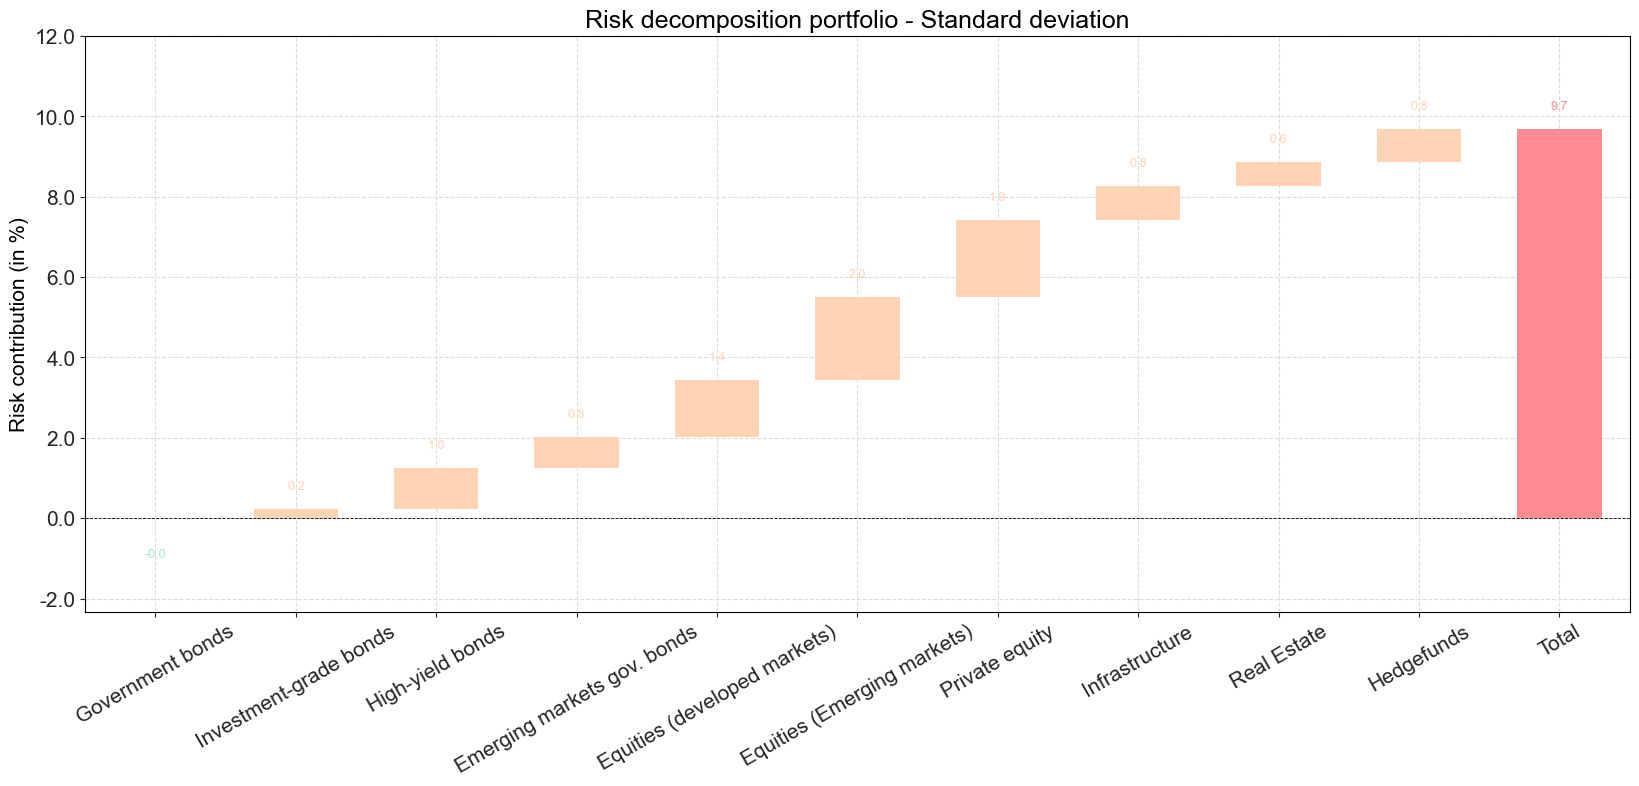

In [109]:
"""
Calculate risk contributions
"""

std_contrib = rb.calculate_risk_contributions_std(weights=eq_w, cov_mat=sigma_l)

"""
Plot waterfall chart
"""

waterfall_chart(labels=asset_names, values=std_contrib*100)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(18.5, 10.5)
ax.set_title('Risk decomposition portfolio - Standard deviation')
ax.set_ylabel('Risk contribution (in %)');

__Question 3__

In [110]:
"""
Define problem
"""

# return targets to consider
return_targets = np.linspace(np.min(mu_l), np.max(mu_l), 100)

# define cvxpy parameter
mu_target = cp.Parameter()

# optimization variable
w = cp.Variable(num_assets)

# define constraints
constraints = [w >= 0]
constraints.append(cp.sum(w) == 1)
constraints.append(w @ mu_l == mu_target)

# define problem
variance = cp.quad_form(w, sigma_l, assume_PSD=True)
prob =  cp.Problem(cp.Minimize(variance), constraints)

In [111]:
"""
Iterate over all possible return targets
"""

# define list for storing optimal portfolios
optimal_portfolios = []

for mu in return_targets:

    # set expected return target
    mu_target.value = mu

    # solve problem
    prob.solve(verbose=False)

    # store optimal weights
    optimal_portfolios.append(w.value)

# transform to numpy array
optimal_portfolios = np.array(optimal_portfolios)

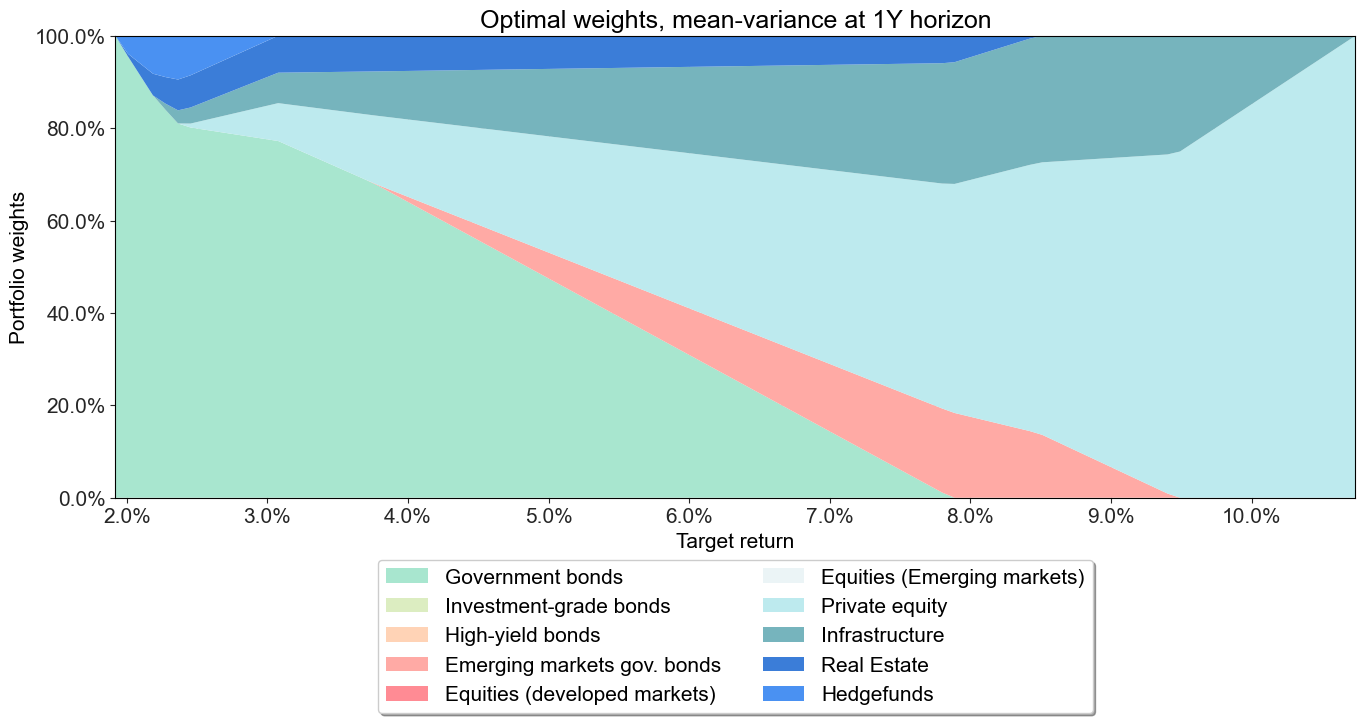

In [112]:
"""
Plot portfolio along the efficient frontier
"""

fig, ax = plt.subplots(figsize=(16, 6))

ax.stackplot(return_targets, optimal_portfolios.T, labels=asset_names);
ax.set_xlabel("Target return")
ax.set_ylabel("Portfolio weights")
ax.set_title("Optimal weights, mean-variance at 1Y horizon")
ticks = mtick.PercentFormatter(1)
ax.yaxis.set_major_formatter(ticks)
ax.xaxis.set_major_formatter(ticks)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2);

__Question 4__

In [113]:
"""
Calculate port. expected return along efficient frontier
"""

eff_port_exp_return = np.apply_along_axis(rm.calculate_portfolio_mean,
                                          1, optimal_portfolios, mu_l)

"""
Calculate port. std
"""

eff_port_std = np.apply_along_axis(rm.calculate_portfolio_std,
                                   1, optimal_portfolios, sigma_l)

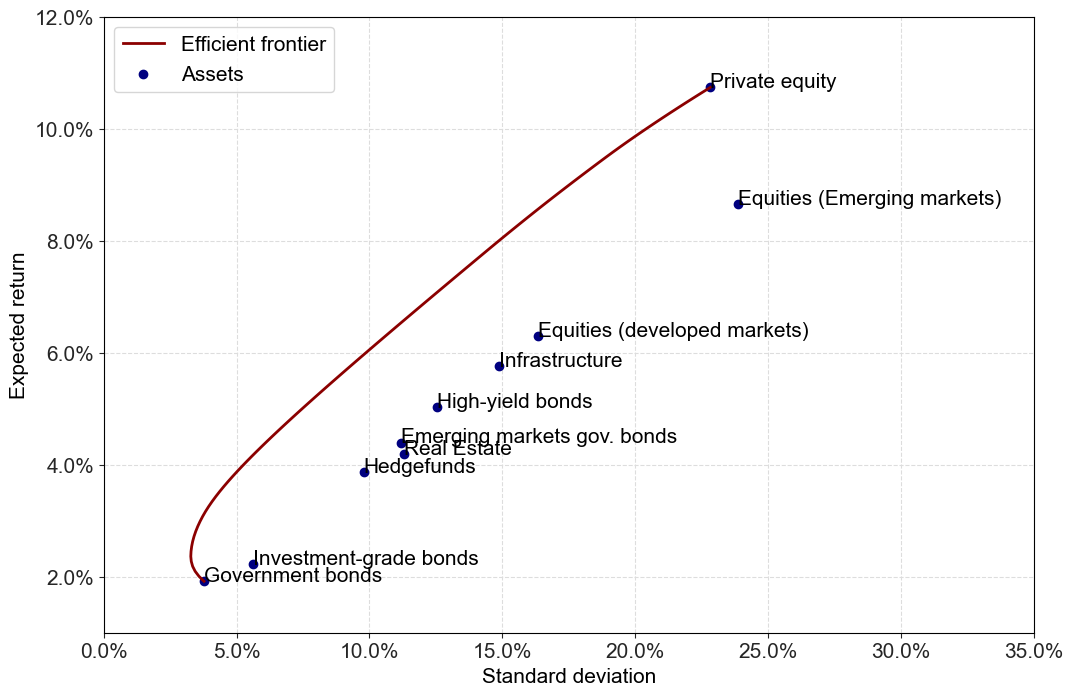

In [114]:
fig, ax = plt.subplots(figsize=(12, 8))

# plot efficient frontier
ax.plot(eff_port_std, eff_port_exp_return, label="Efficient frontier",
        color="darkred")

# add the different assets
assets_std = np.sqrt(np.diag(sigma_l))
ax.scatter(assets_std, mu_l, color="navy", label="Assets")
for i in range(num_assets):
    ax.annotate(asset_names[i], (assets_std[i], mu_l[i]))

# set correct tick labels, etc.
ticks = mtick.PercentFormatter(1)
ax.yaxis.set_major_formatter(ticks)
ax.xaxis.set_major_formatter(ticks)

ax.set(xlabel="Standard deviation", ylabel="Expected return")

ax.set_xlim([0.0, 0.35])
ax.set_ylim([0.01, 0.12])
ax.legend(loc="upper left");

__Question 5__

In [115]:
"""
Define problem
"""

# return targets to consider
return_targets = np.linspace(np.min(mu_l) + 0.015, np.max(mu_l) - 0.03, 100)

# define cvxpy parameter
mu_target = cp.Parameter()

# optimization variable
w = cp.Variable(num_assets)

# define constraints
constraints = [w >= 0]
constraints.append(cp.sum(w) == 1)
constraints.append(w @ mu_l == mu_target)
constraints.append(w<=0.25)
constraints.append(np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]) @ w <= 0.4)

# define problem
variance = cp.quad_form(w, sigma_l, assume_PSD=True)
prob =  cp.Problem(cp.Minimize(variance), constraints)

In [116]:
"""
Iterate over all possible return targets
"""

# define list for storing optimal portfolios
optimal_portfolios_w_max_alloc = []

for mu in return_targets:

    # set expected return target
    mu_target.value = mu

    # solve problem
    prob.solve(verbose=False, solver='OSQP')

    # store optimal weights
    optimal_portfolios_w_max_alloc.append(w.value)

# transform to numpy array
optimal_portfolios_w_max_alloc = np.array(optimal_portfolios_w_max_alloc)

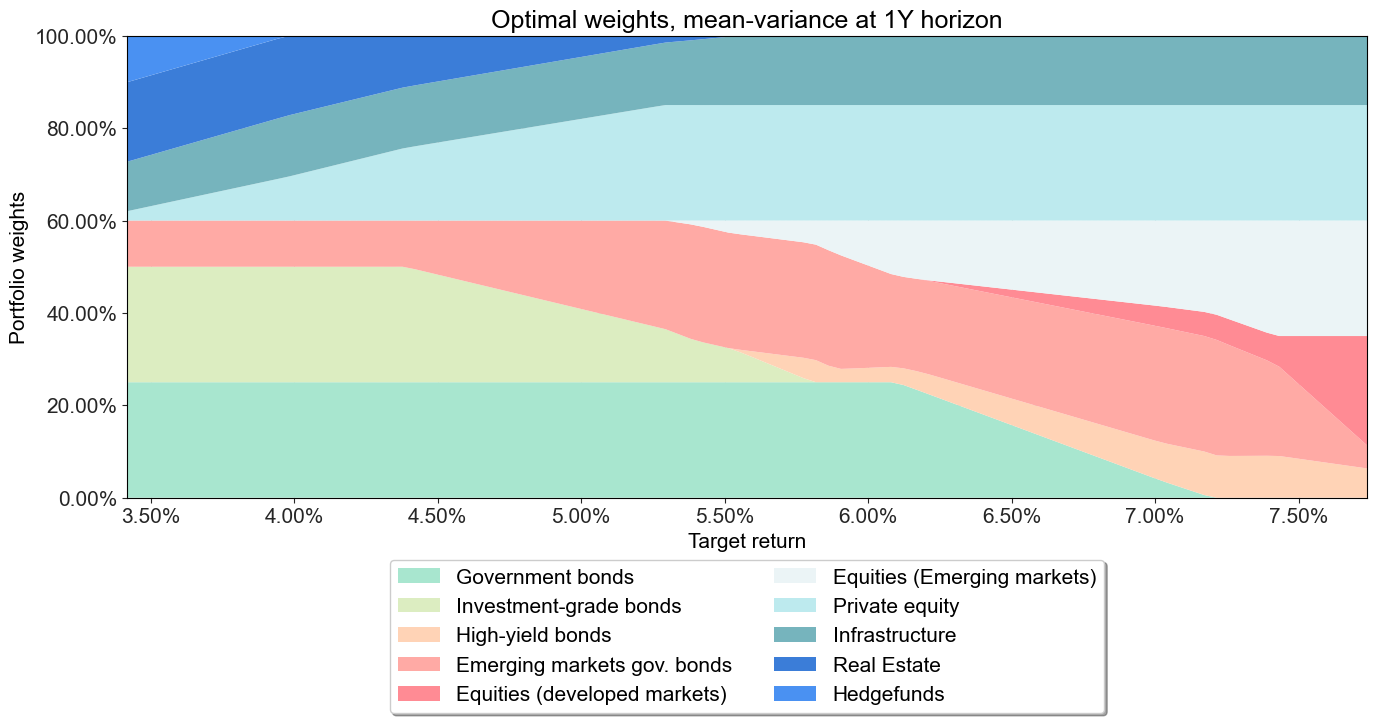

In [117]:
"""
Plot portfolio along the efficient frontier
"""

fig, ax = plt.subplots(figsize=(16, 6))

ax.stackplot(return_targets, optimal_portfolios_w_max_alloc.T,
             labels=asset_names);
ax.set_xlabel("Target return")
ax.set_ylabel("Portfolio weights")
ax.set_title("Optimal weights, mean-variance at 1Y horizon")
ticks = mtick.PercentFormatter(1)
ax.yaxis.set_major_formatter(ticks)
ax.xaxis.set_major_formatter(ticks)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2);

In [118]:
"""
Calculate port. expected return along efficient frontier
"""

eff_port_exp_return_w_max_alloc= np.apply_along_axis(rm.calculate_portfolio_mean,
                                          1, optimal_portfolios_w_max_alloc, mu_l)

"""
Calculate port. std
"""

eff_port_std_w_max_alloc = np.apply_along_axis(rm.calculate_portfolio_std,
                                   1, optimal_portfolios_w_max_alloc, sigma_l)

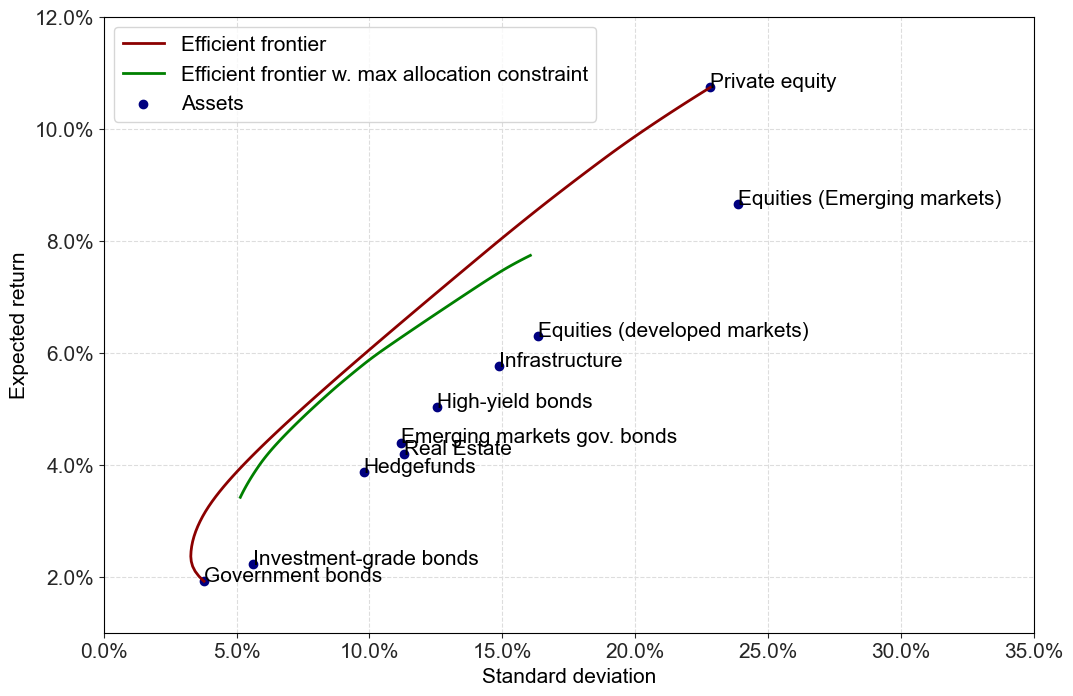

In [119]:
fig, ax = plt.subplots(figsize=(12, 8))

# plot efficient frontier
ax.plot(eff_port_std, eff_port_exp_return, label="Efficient frontier",
        color="darkred")

ax.plot(eff_port_std_w_max_alloc, eff_port_exp_return_w_max_alloc,
        label="Efficient frontier w. max allocation constraint",
        color="green")

# add the different assets
assets_std = np.sqrt(np.diag(sigma_l))
ax.scatter(assets_std, mu_l, color="navy", label="Assets")
for i in range(num_assets):
    ax.annotate(asset_names[i], (assets_std[i], mu_l[i]))

# set correct tick labels, etc.
ticks = mtick.PercentFormatter(1)
ax.yaxis.set_major_formatter(ticks)
ax.xaxis.set_major_formatter(ticks)

ax.set(xlabel="Standard deviation", ylabel="Expected return")

ax.set_xlim([0.0, 0.35])
ax.set_ylim([0.01, 0.12])
ax.legend(loc="upper left");

## Problem 6: Hedging a cash flow

__Question 1__

Download the US Treasury nominal zero coupon yields using e.g. `dal.fred_yield_data.get_nominal_yield_data`.

Visualize the data using a scatter plot for 2nd September 2025.

__Question 2__

For simplicity, assume that we have 8 bullet bonds available with respectively 1, 3, 5, 7, 10, 13, 15, 20 years to maturity. All have bonds have a coupon of 4\% with annual payments and face value of 100 (e.g the 3 year bond has a payment of 4 one and two year from now, and a payment of 104 three years from now).

Calculate the present value (price) of the bonds cash flow.

__Question 3__

Create a cash flow matrix (number of bonds x number of cash flow time points) using all the bonds such that the rows contains the cash flows for each bond.

__Question 4__

Asssume a liability cash flow of


|  Time  |            Cash flow |
|---:|-------------:|
|  1 | 1000000   |
|  2 | 1100000 |
|  3 | 1200000 |
|  4 | 1300000 |
|  5 | 1400000 |
|  6 | 1500000 |
|  7 | 1400000 |
|  8 | 1300000 |
|  9 | 1200000 |
| 10 | 1100000 |
| 11 | 1000000  |
| 12 | 900000       |
| 13 | 800000       |
| 14 | 700000       |
| 15 | 600000       |
| 16 | 500000       |
| 17 | 400000       |
| 18 | 300000       |
| 19 | 200000       |
| 20 | 100000       |

Plot the liability cash flow with a bar plot.

__Question 5__

It is possible to solve the simple cash flow matching problem using linear programming [[W]](https://en.wikipedia.org/wiki/Cashflow_matching). Suppose that we have a choice of $j=1,...,n $ bonds with which to receive cash flows over $t=1,...,T$ time periods in order to cover liabilities $L_{1},...,L_{T}$ for each time period.  The $j$th bond in time period $t$ is assumed to have known cash flows $C_{jt}$ and initial price $p_{j}$. It possible to buy $x_{j}$ bonds and to run a surplus $s_{t}$ in a given time period, both of which must be non-negative, and leads to the set of constraints

$$\begin{align}
\sum_{j=1}^{n}C_{j1}x_{j} - s_{1} &= L_{1} \\
\sum_{j=1}^{n}C_{jt}x_{j} + s_{t-1} - s_{t} &= L_{t}, \quad t = 2,...,T
\end{align}
$$

Our goal is to minimize the initial cost of purchasing bonds to meet the liabilities in each time period, given by $\mathbf{p}^{\top} \mathbf{x}$. Together, these requirements give rise to the associated linear programming problem

$$
\min \mathbf{p}^\top \mathbf{x}
$$

subject to the constraints

$$
\mathbf{C}^\top \mathbf{x} + \mathbf{R} \mathbf{s} \geq \mathbf{L}
$$

and

$$
\mathbf{x}, \mathbf{s} \geq 0
$$

where $\mathbf{C}$ is the $n \times T$ matrix and $\mathbf{R}$ is a $T \times T$ matrix with $R_{t,t}=-1$ and $R_{t+1, t}=1$

Define and solve the cash flow matching problem using either `cvxopt` or `cvxpy`.

__Question 6__

Compare the cummulative liability cash flow with the cummulative hedge cash flow using a bar plot.

### Solution

__Question 1__


In [120]:
# Get zero yields
df_zero_yields = get_nominal_yield_data(output_type="zero_yields")
zero_yields = df_zero_yields.loc['2025-09-02', :].values

# define tenors / time to maturity
tenors = np.array([float(text[-2:])  for text in df_zero_yields.columns])

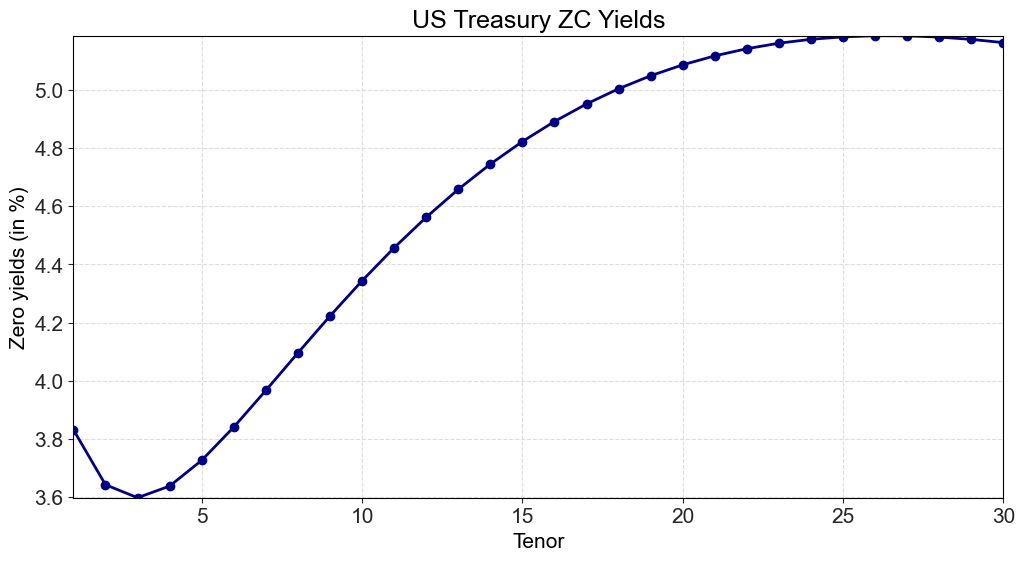

In [121]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(tenors, zero_yields, color="navy", linestyle="-", marker="o")
ax.set(xlabel="Tenor", ylabel="Zero yields (in %)", title="US Treasury ZC Yields");

__Question 2__

In [122]:
from scipy.interpolate import splev, splrep
from functools import reduce

# define zero coupon curve - divid by 100 to get yields to decimal number
zero_curve_spline = splrep(tenors, zero_yields / 100)

In [123]:
"""
One possibility would also just be to type the cash flow matrix manually...
"""

coupon = 0.04

# define maturities
maturities = np.array([1, 3, 5, 7, 10, 13, 15, 20])

# prices
prices = list()
# cash flow time points
term_info = list()
# cash flows
flow_info = list()

# loop over all maturities
for maturity in maturities:

    # create cash flow time points
    terms = np.arange(1.0, maturity + 1.0, 1.0)
    # create cash flow
    flows = np.ones_like(terms) * 100 * 0.04
    flows[-1] += 100

    # store info
    term_info.append(terms)
    flow_info.append(flows)

    # calculate price
    prices.append(np.sum(flows * np.exp(-terms * splev(terms, zero_curve_spline))))

In [124]:
df_res = pd.DataFrame(index=maturities, data=prices, columns=["Price"])
df_res.index.name="Maturity"
df_res

,Price
Maturity,
1,100.090212
3,100.926866
5,100.937054
7,99.898036
10,97.120041
13,93.875812
15,91.809504
20,87.613449


__Question 3__

In [125]:
# Get union of all cash flow time points
all_terms = reduce(np.union1d, term_info)

# define the shape of the cash flow matrix
cash_flow_matrix = np.zeros((maturities.shape[0] , all_terms.shape[0]))

# create the cash flow matrix
idx = 0
for terms, flows in zip(term_info, flow_info):

    indicator = np.isin(all_terms, terms)
    cash_flow_matrix[idx, indicator] = flows

    idx += 1

In [126]:
pd.DataFrame(index=maturities, data=cash_flow_matrix, columns=all_terms)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,4.0,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0
20,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,104.0


__Question 4__

In [127]:
liab_time_points = np.arange(1.0, 21.0, 1.0)
liab_cash_flows = np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5,
                            1.4, 1.3, 1.2, 1.1, 1.0, 0.9,
                            0.8, 0.7, 0.6, 0.5, 0.4, 0.3,
                            0.2, 0.1]) * 1e6

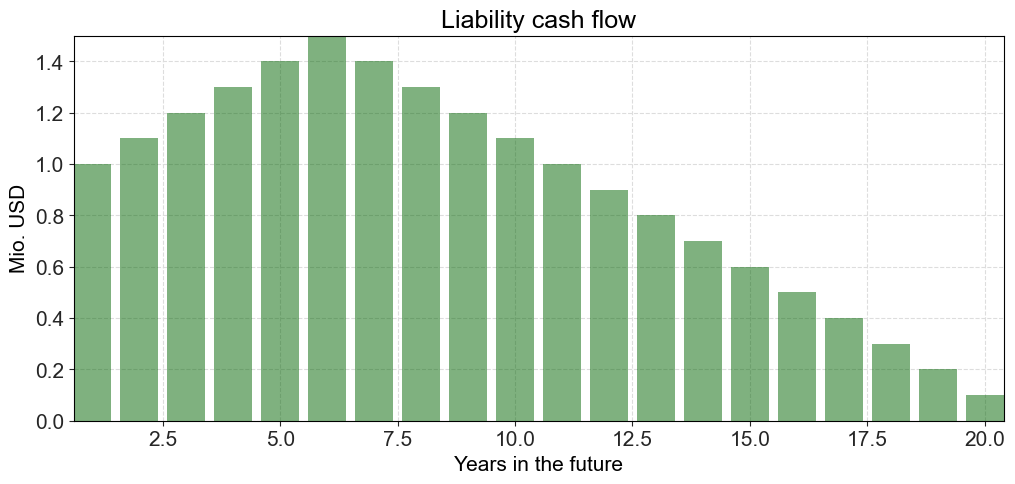

In [128]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(liab_time_points, liab_cash_flows / 1e6, color="darkgreen", alpha=0.5);

ax.set_title("Liability cash flow")
ax.set_xlabel("Years in the future")
ax.set_ylabel("Mio. USD");

__Question 5__

In [129]:
num_time_points = len(liab_time_points)
num_bonds = len(maturities)

r_mat  = -np.eye(num_time_points)
r_mat[range(num_time_points - 1), range(1, num_time_points)] =  1

In [130]:
x = cp.Variable(num_bonds)
s = cp.Variable(num_time_points)

c_mat = cash_flow_matrix
b_vec = liab_cash_flows
p_vec = np.array(prices)

problem = cp.Problem(cp.Minimize(p_vec @ x),
                     [c_mat.T @ x + r_mat.T @ s >= b_vec, x >= 0, s >= 0])

problem.solve()

x.value

array([10545.75596962, 15591.23558434, 21057.17187904, 30814.3349481 ,
       25050.9873517 , 12884.04641698, 19045.85800225,   961.53840327])

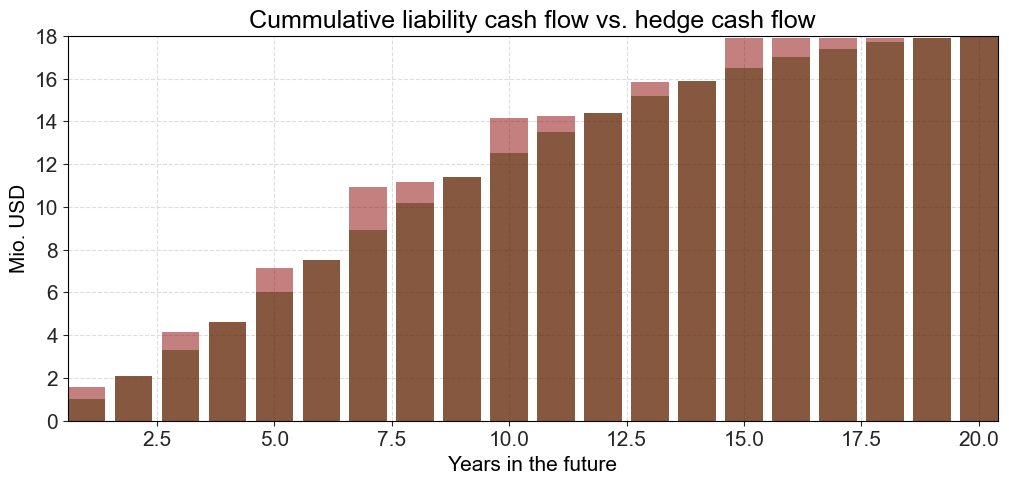

In [131]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(liab_time_points, liab_cash_flows.cumsum() / 1e6, color="darkgreen", alpha=0.5);
ax.bar(liab_time_points, (c_mat.T @ x.value).cumsum() / 1e6, color="darkred", alpha=0.5);

ax.set_title("Cummulative liability cash flow vs. hedge cash flow")
ax.set_xlabel("Years in the future")
ax.set_ylabel("Mio. USD");